In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### Questão 1

In [10]:
N = 1000
av_degree = 8
m = int(av_degree/2)
GBA = nx.barabasi_albert_graph(N, m)

In [11]:
print("Average clustering coefficient: ",nx.average_clustering(GBA))

Average clustering coefficient:  0.03734717914216904


In [12]:
def momment_of_degree_distribution2(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M
print("Segundo momento: ", momment_of_degree_distribution2(GBA,2))

Segundo momento:  142.984


In [13]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values()) 
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) 
    Pk = np.zeros(maxk+1) 
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) 
    return kvalues,Pk

def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

print("Segundo momento: ", momment_of_degree_distribution(GBA,2))

Segundo momento:  142.98400000000004


### Questão 2

In [14]:
ER = nx.erdos_renyi_graph(1000,0.01)
GBA = nx.barabasi_albert_graph(1000, int(10/2))

In [15]:
def degree_distribution(GER):
    vk = dict(GER.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

In [16]:
import math
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

print("Shannon Entropy Erdös-Reyni = ", "%3.4f"%shannon_entropy(ER))
print("Shannon Entropy Barabasi-Albert = ", "%3.4f"%shannon_entropy(GBA))

Shannon Entropy Erdös-Reyni =  3.6654
Shannon Entropy Barabasi-Albert =  3.5762


### Questão 3

In [17]:
GBA = nx.barabasi_albert_graph(1000, int(10/2))

degrees = [GBA.degree(n) for n in GBA.nodes()]

EC = dict(nx.eigenvector_centrality(GBA, max_iter = 1000))
EC = list(EC.values())
#av_EC = np.mean(EC)
#print('Average eigenvector centrality', av_EC)

In [18]:
rho = np.corrcoef(degrees, EC)[0,1]
print('Pearson correlation coefficient:', rho)

Pearson correlation coefficient: 0.9348463648851482


### Questão 4

In [19]:
GBA = nx.barabasi_albert_graph(500, int(10/2))
degrees = [GBA.degree(n) for n in GBA.nodes()]

In [20]:
B = dict(nx.betweenness_centrality(GBA))
B = list(B.values())
#print('Betweeness centrality:', B)
rho = np.corrcoef(B,degrees)[0,1]
print('Pearson correlation coefficient:', rho)

Pearson correlation coefficient: 0.9561776991960528


### Questão 5

Segundo momento: 10.25


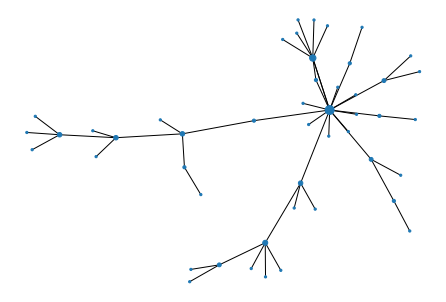

In [24]:
from random import *
N = 500
a = 3
seq = np.random.zipf(a, N) #Zipf distribution
if(sum(seq)%2 != 0): # the sum of stubs have to be even
    pos = randint(0, len(seq))
    seq[pos] = seq[pos]+ 1

GCM=nx.configuration_model(seq)

#get the largest component
Gcc = sorted(nx.connected_components(GCM), key = len, reverse = True)
GCM = GCM.subgraph(Gcc[0])

d = dict(GCM.degree())

print("Segundo momento:", momment_of_degree_distribution(GCM,2))

nx.draw(GCM, nodelist=d.keys(), node_size=[v * 5 for v in d.values()])
plt.show()